# 广义线性模型

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

## 1. 线性模型的基本概念

线性模型是统计学中的一个术语，被广泛应用到基于机器学习的多个领域中，甚至被很多研究人员集成到诸如神经网络的复杂系统中。在机器学习中，常见的线性模型包括：线性回归（Linear Regression）、岭回归（Ridge Regression）、套索回归（Lasso Regression)、逻辑回归（Logistic Regression）、线性SVC等。

### 1.1 线性模型的数学表达

线性模型的一般公式为：

$\hat{y} = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b$

其中, 
- $x[0],x[1],...x[p]$ 是数据集中的特征变量;
- 参数 $p$ 表示每个样本都有 $p$ 个特征；
- $w$ 和 $b$ 是模型的参数；
- $\hat{y}$ 是模型对给定数据的预测结果， $\hat{y}$ 读作：*y hat*，一般来说 *hat* 表示估计值。。

若数据只有一个特征变量，则线性模型可以被简化为:

$\hat{y} = w[0]*x[0] + b$

对于简化模型来说，$\hat{y}$ 就是一条直线方程。 $w[0]$ 直线的斜率，也成为权重；$b$ 是 $y$ 轴的偏移量（截距）。

**<font color="red">模型的预测可以看作输入特征的加权和，参数 $w$ 代表的是每个特征的权值。 </font>**

****

假设有一条直线，其数学表达式为: $y = 0.5x + 3$，将其可视化后可以得到：

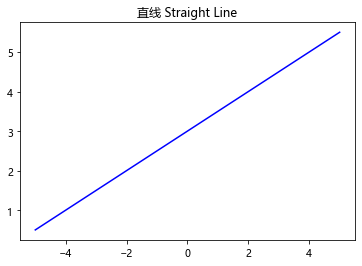

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 配置参数使 matplotlib绘图工具可以显示中文
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

# 设置自变量 x：令x为-5到5之间，元素数量为100的等差数列
x = np.linspace(-5, 5, 100)

# 按照方程的数学表达式，定义直线方程
y = 0.5*x + 3

# 设置绘图内容的基本参数
plt.plot(x, y, c = "blue")
# 设置图的题目
plt.title("直线 Straight Line")
# 激活绘图功能，在坐标轴上显示直线
plt.show()

### 1.2 线性模型的可视化

#### 1.2.1 基于两个数据点的模型拟合和可视化

- 拟合样本及可视化

假设存在坐标(1, 3) 和 (4, 5)，以这两点可以构建一条直线，同时可以获得过这两个点的直线方程

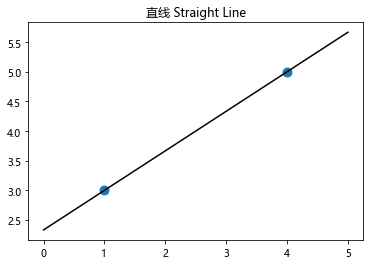

In [38]:
# 导入线性回归模型
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 配置参数使 matplotlib绘图工具可以显示中文
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

# 输入两个点的坐标，分别保存在矩阵 x 和 y 中
X = [[1], [4]]
y = [3, 5]

# 使用线性模型拟合给定的样本点
lr = LinearRegression().fit(X, y)

# 画出点和基于点生成的直线
z = np.linspace(0, 5, 20) # 生成 0到5之间，元素个数为20的等差数列
z = z.reshape(-1, 1) # 将矩阵转换为 n 行，1列的矩阵

plt.scatter(X, y, s = 80)
# 可视化预测结果，其中：
# 横坐标： 变量 z;
# 纵坐标： 基于 变量 z 和 线性模型 lr 生成的预测值。
# 第三个参数c：线的颜色
plt.plot(z, lr.predict(z), c = "k") 

# 设定图的显示信息并显示图片
plt.title("直线 Straight Line")
plt.show()

In [26]:
z = np.linspace(0, 5, 20)
z

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

此处，值得注意的是：对于任意样本可能存在多个特征，因此对于X来说，需要将每个样本的特征X都保存在序列中，例如，如果存在两个样本，其中样本A特征为 $x_1 = [a_1, b_1, c_1]$, 值为$y_1$，样本B的特征为$x_2 = [a_2, b_2, c_2]$, 值为 $y_2$。则，矩阵定义应该为：

- 生成拟合后的直线方程

In [27]:
print("直线方程为：\n")
print("y = {:.3f}".format(lr.coef_[0]), "x", "+ {:.3f}".format(lr.intercept_))

直线方程为：

y = 0.571 x + 2.143


此处，变量 lr 是利用给定点和线性回归算法生成的“线性回归模型”，其中lr.predict()可以实现对新样本的预测，lr.coef_[0]是第一个特征的权重 $w$，lr.intercept_是模型的偏移值（截距）。

#### 1.2.2 基于三个数据点的模型拟合和可视化

假设存在三个坐标点：(1, 3)、 (4, 5)、 (3, 3)

- 拟合样本及可视化

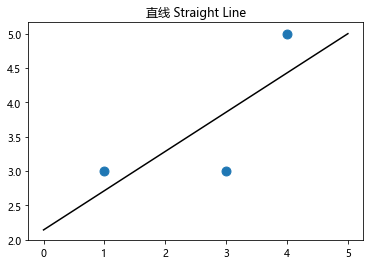

In [44]:
# 导入线性回归模型
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 配置参数使 matplotlib绘图工具可以显示中文
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

# 输入三个点的坐标，分别保存在矩阵 x 和 y 中
X = [[1], [4], [3]]
y = [3, 5, 3]

# 使用线性模型来拟合这3个样本点
lr = LinearRegression().fit(X, y)

# 画出点和基于点生成的直线
z = np.linspace(0, 5, 20) # 生成 0到5之间，元素个数为20的等差数列
z = z.reshape(-1, 1) # 将矩阵转换为 n 行，1列的矩阵

plt.scatter(X, y, s = 80)
# 可视化预测结果，其中：
# 横坐标： 变量 z;
# 纵坐标： 基于 变量 z 和 线性模型 lr 生成的预测值。
# 第三个参数c：线的颜色
plt.plot(z, lr.predict(z), c = "k") 

# 设定图的显示信息并显示图片
plt.title("直线 Straight Line")
plt.show()

从结果来看，直线并没有经过任何一个样本点，实际上拟合出来的直线并非刻意不经过任何样本，而是位于所有样本点加权和最小的位置。

- 生成拟合后的直线方程

In [45]:
print("直线方程为：\n")
print("y = {:.3f}".format(lr.coef_[0]), "x", "+ {:.3f}".format(lr.intercept_))

直线方程为：

y = 0.571 x + 2.143


#### 1.2.3 基于多样本的模型拟合和可视化

此处，我们使用make_regression数据集作为样本来生成曲线。

- 拟合样本及可视化


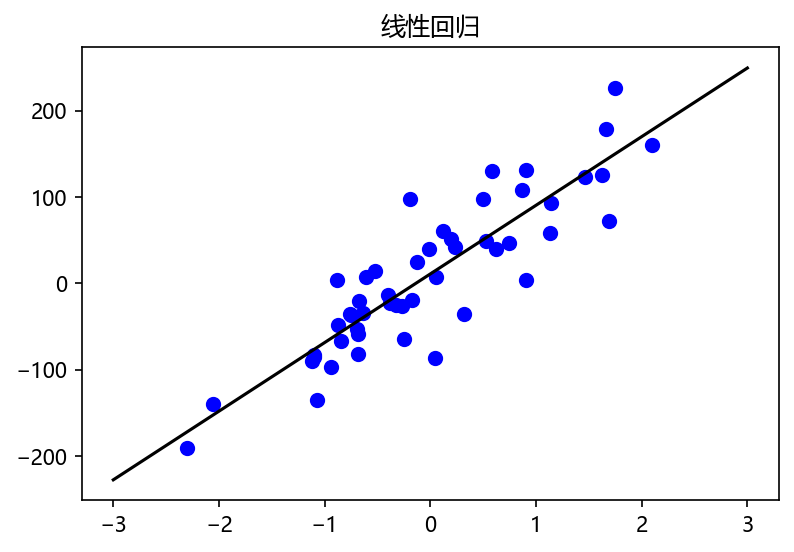

In [11]:
# 导入线性回归模型等多个库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# 配置参数使 matplotlib绘图工具可以显示中文
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

# 使用make_regression()函数生成数据集
X, y = make_regression(n_samples = 50, n_features = 1, n_informative = 1,
                      noise = 50, random_state = 1)

# 使用线性模型来拟合这3个样本点
lr = LinearRegression().fit(X, y)

# 画出点和基于点生成的直线
z = np.linspace(-3, 3, 200) # 生成 -3到3之间，元素个数为200的等差数列
z = z.reshape(-1, 1) # 将矩阵转换为 n 行，1列的矩阵

plt.figure(dpi=150)
plt.scatter(X, y, c = "b", s = 40) # s为散点的尺度
# 可视化预测结果，其中：
# 横坐标： 变量 z;
# 纵坐标： 基于 变量 z 和 线性模型 lr 生成的预测值。
# 第三个参数c：线的颜色
plt.plot(z, lr.predict(z), c = "k") 

# 设定图的显示信息并显示图片
plt.title("线性回归")
plt.show()

值得注意的是，拟合所生成的直线是整个平面中的所有直线中，距离所有样本数据点距离之和是最小的一条。

<font style="color:red; font-weight:bold;">【知识点】[reshape(-1, 1)](functions/reshape.ipynb)</font>

- 生成拟合后的直线方程

In [51]:
print("直线方程为：\n")
w = lr.coef_[0]
b = lr.intercept_
print("y = {:.3f}".format(w), "x", "+ {:.3f}".format(b))
print("其中，权重系数为: {0:.3f}, 截距为: {1:.3f}。".format(w, b))

直线方程为：

y = 79.525 x + 10.922
其中，权重系数为: 79.525, 截距为: 10.922。


*在sciki-learn工具包中，所有的数据属性都以“_”结尾，以便和其他自定义变量做区分，例如coef_表示权重系数，intercept_表示截距。*

### 1.3 线性模型的优缺点

- 优点
    - 建模速度快，不需要复杂的计算，特别是在大数据量下依然具有较快的运算速度
    - 可以根据系数给出每个变量的理解和解释
- 缺点
    - 不能很好拟合非线性数据，因此需要先判断变量间是否具有线性关系

为什么线性回归模型依然有效？
1. 线性回归能够模拟的数据远不止线性关系，并且回归中的“线性"指的是系数的线性，通过特征的非线性变换及广义线性模型的推广，输出和特征之间可以是高度非线性的；
2. 线性模型的易解释性让它在物理学、经济学、商学等领域具有不可替代的地位。

## 2. 最基本的线性模型——线性回归（Linear Regression）

### 2.1 线性回归模型的基本原理

线性回归也称为普通最小二乘法（Ordinary Least Squares，OLS），其原理是：**找到一个超平面（一维数据时为直线，二维数据时为平面，高维数据时为超平面），该超平面上所有的预测值 $/hat{y}$ 和真实值 $y$ 的平方差是所有超平面中最小的。**

寻找超平面的过程就是求解该超平面参数的过程，对于线性回归模型，参数包括:每个特征的权值 $w_i$ 和 截距 *b*。假设数据集中的样本具有*n*个特征，那么，参数个数为 *n+1*。

线性回归模型没有需要用户调节的参数，这类参数，我们将其称为**超参数**。它的优点是简单，缺点是无法调节模型的复杂性。

下面将给出一个线性回归的例子，基本步骤如下：
1. 使用make_regression()函数生成一个样本数为100，特征数为2的的数据集
2. 使用train_test_split()函数对数据集进行划分
3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
4. 性能分析

In [25]:
# 0.导入数据集生成工具和拆分工具
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [26]:
# 1. 使用make_regression()函数生成一个样本数为1000，特征数为2的的数据集
X, y = make_regression(n_samples = 1000, n_features = 2, n_informative = 2, random_state = 38, noise = 0)

In [27]:
# 2. 使用train_test_split()函数对数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, test_size = 0.7)

In [28]:
# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
lr = LinearRegression().fit(X_train, y_train)
w = lr.coef_
b = lr.intercept_

# 显示回归模型的方程及参数
print("lr.coef_: {}".format(w))
print("lr.intercept_: {}".format(b))
print("回归方程为：")
print("y = {0:.3f}*x1 + {1:.3f}*x2 + {2}".format(w[0], w[1], b))

lr.coef_: [ 0.47026977 72.59456432]
lr.intercept_: 0.0
回归方程为：
y = 0.470*x1 + 72.595*x2 + 0.0


由结果可以看到，权重参数 *w* 是一个Numpy数组，截距参数 *b* 是一个浮点数。当样本具有多个特征值时（*n*），权重参数 *w*也具有 *n*个，总的参数个数就为 *n+1* 个。

In [29]:
# 4. 性能分析
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
print("训练集得分: {:.3f}".format(score_train))
print("测试集得分: {:.3f}".format(score_test))

训练集得分: 1.000
测试集得分: 1.000


<font style="font-size:1.5em; font-weight:bold; color: red;">Surprise!</font>

这是一个令人惊讶的结果！是的训练集和测试集的结果都是100%，多么令人开心啊！然而，这个结果确是一个不真实的，因为数据集中并没有噪声，即没有干扰样本。

这在真实世界中是不可能的！

下面我们为样本增加一些噪音（干扰数据），令 noise = 30

In [30]:
# 0.导入数据集生成工具和拆分工具
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. 使用make_regression()函数生成一个样本数为1000，特征数为2的的数据集
X, y = make_regression(n_samples = 1000, n_features = 2, n_informative = 2, random_state = 38, noise = 30)

# 2. 使用train_test_split()函数对数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, test_size = 0.7)

# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
lr = LinearRegression().fit(X_train, y_train)

# 4. 性能分析
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
print("训练集得分: {:.3f}".format(score_train))
print("测试集得分: {:.3f}".format(score_test))

训练集得分: 0.851
测试集得分: 0.845


### 2.2 基于线性回归模型的糖尿病数据集分析

In [31]:
# 0.导入数据集生成工具和拆分工具
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. 载入糖尿病情数据集
from sklearn.datasets import load_diabetes
X = load_diabetes().data
y = load_diabetes().target

# 2. 使用train_test_split()函数对数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
lr = LinearRegression().fit(X_train, y_train)

# 4. 性能分析
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
print("训练集得分: {:.3f}".format(score_train))
print("测试集得分: {:.3f}".format(score_test))

训练集得分: 0.530
测试集得分: 0.459


<font style="font-size:1.5em; font-weight:bold; color: blue;">是否吃惊？</font>

这是就是真实数据集的运算结果——低劣的性能！

一个问题? 为什么 训练集的性能 明显优于 测试集的性能？

这种现象称为<font color="red">**过拟合！**</font>

我们将在后续的课程中以专题形式探讨"[过拟合和欠拟合](knowledgement/overfitting_underfitting.ipynb)"问题。

## 3. 使用L2正则化的线性模型——岭回归（Ridge Regression） 

### 3.1 岭回归的原理

岭回归也是一种线性模型，它是一种改良的最小二乘法。岭回归保留了所有的特征变量，但它通过L2约束实现减小特征变量的系数值，这使用特征变量对预测结果的影响变小，这种方法在一定程度上降低了过拟合问题（即训练误差和测试误差之间的差距变小）。

在岭回归中，存在一个超参数alpha，该超参数可以用来控制减小特征变量系数的程度。

这种通过保留特征变量，只降低特征变量的系数值来避免过拟合的方法，我们称之为L2正则化。

### 3.2 基于岭回归的预测

#### 3.2.1 岭回归在"糖尿病情"数据集上的应用

In [32]:
# 0.导入数据集生成工具和拆分工具
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# 1. 载入糖尿病情数据集
from sklearn.datasets import load_diabetes
X = load_diabetes().data
y = load_diabetes().target

# 2. 使用train_test_split()函数对数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
ridge = Ridge().fit(X_train, y_train)

# 4. 性能分析
score_train = ridge.score(X_train, y_train)
score_test = ridge.score(X_test, y_test)
print("训练集得分: {:.3f}".format(score_train))
print("测试集得分: {:.3f}".format(score_test))

训练集得分: 0.433
测试集得分: 0.433


从结果中我们可以得到以下结论（仅针对"糖尿病情"数据集来分析)：
1. 无论是训练集，还是测试集的预测结果，岭回归的结果都要差于线性回归。原因可能是样本数量较少
2. 训练集和测试集之间的误差非常小。这说明，岭回归所用的L2约束有效地降低了过拟合的问题。换句话说岭回归比线性模型具有更强的泛化能力。

<font color="red">**【知识点】**模型泛化: 泛化能力（generalization ability）是指机器学习算法对新鲜样本的适应能力。 [1]  学习的目的是学到隐含在数据背后的规律，对具有同一规律的学习集以外的数据，经过训练的网络也能给出合适的输出，该能力称为泛化能力。</font>

#### 3.2.2 岭回归在"波士顿房价"数据集上的应用

In [1]:
# 1. 载入波士顿房价数据集
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# 或许数据集中的数据和标签
X = load_boston().data
y = load_boston().target

# 2. 使用train_test_split()函数对数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
Ridge = Ridge().fit(X_train, y_train)

# 4. 性能分析
score_train = Ridge.score(X_train, y_train)
score_test = Ridge.score(X_test, y_test)
print("训练集得分: {:.3f}".format(score_train))
print("测试集得分: {:.3f}".format(score_test))

训练集得分: 0.743
测试集得分: 0.708


#### 3.2.3 岭回归的参数调节

岭回归是在模型的"简单性(使系数趋近于0)"和"训练集上的性能"两个指标上进行平衡。默认情况下，超参数alpha=1。

<font color="red">【知识点】机器学习的超参数没有绝对性，通常需要根据数据集的不同进行调节。超参数的选择是一个非常经验性的工作，也是一个非常困难的工作，需要程序员在长期的工作中总结和归纳。当然，当前已经有不少的算法用于实现超参数的选择和搜索。</font>

对于标准的岭回归来说，超参数alpha具有一定的规律：增大alpha将会降低特征变量的系数，使其趋近于0，从而降低训练集的性能，但有助于提高泛化性能。

下面将继续基于"糖尿病"数据集来分析超参数alpha对于岭回归模型的影响。

In [36]:
# 0.导入数据集生成工具和拆分工具
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# 1. 载入糖尿病情数据集
from sklearn.datasets import load_diabetes
X = load_diabetes().data
y = load_diabetes().target

# 2. 使用train_test_split()函数对数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
ridge = Ridge(alpha = 10).fit(X_train, y_train)

# 4. 性能分析
score_train = ridge.score(X_train, y_train)
score_test = ridge.score(X_test, y_test)
print("训练集得分: {:.3f}".format(score_train))
print("测试集得分: {:.3f}".format(score_test))

训练集得分: 0.151
测试集得分: 0.162


从实验结果可以看到，提高alpha之后，模型性能大幅下降。但有趣的是测试集的得分超过了训练集，这也进一步说明alpha值的提高有利于改进过拟合问题。

In [45]:
# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
ridge = Ridge(alpha = 0.1).fit(X_train, y_train)

# 4. 性能分析
score_train = ridge.score(X_train, y_train)
score_test = ridge.score(X_test, y_test)
print("训练集得分: {:.3f}".format(score_train))
print("测试集得分: {:.3f}".format(score_test))

训练集得分: 0.522
测试集得分: 0.473


继续调节alpha值，当alpha取一个非常小的值时（典型值 alpha = 0.1），L2的正则化效果将忽略不计，结果也更加接近线性回归。

值得注意的是，当alpha = 0.1时，训练集的性能所下降，但测试集的性能有一定的提升。这说明：<font color="red">**降低过拟合的风险，有助于提高系统性能。**</font> 换句话说，选择合适的alpha值，可以有效提高系统的性能，并提高泛化能力。

值得一提的是：当alpha=0时，岭回归将简化为线性回归。

In [38]:
# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
ridge = Ridge(alpha = 0).fit(X_train, y_train)

# 4. 性能分析
score_train = ridge.score(X_train, y_train)
score_test = ridge.score(X_test, y_test)
print("训练集得分: {:.3f}".format(score_train))
print("测试集得分: {:.3f}".format(score_test))

训练集得分: 0.530
测试集得分: 0.459


#### 3.2.4 更详细的性能分析

1. alpha对coef_属性的影响

较高的alpha值表示约束越强，coef_会变得越小；较小的alpha值表示约束越弱, coef_会变得越大; 当alpha = 0时，岭回归简化为线性模型。

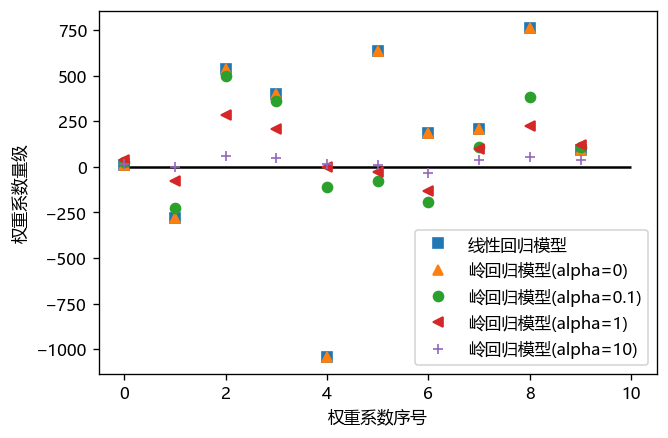

In [12]:
# 0.导入数据集生成工具和拆分工具
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 配置参数使 matplotlib绘图工具可以显示中文
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

# 1. 载入糖尿病情数据集
from sklearn.datasets import load_diabetes
X = load_diabetes().data
y = load_diabetes().target

# 2. 使用train_test_split()函数对数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
lr = LinearRegression().fit(X_train, y_train)
ridge0 = Ridge(alpha = 0).fit(X_train, y_train)
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge1 = Ridge(alpha = 1).fit(X_train, y_train)
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# 4. 将超参数 alpha 对 参数coef_ 的影响进行可视化
# 分别绘制线性回归模型, alpha = [0, 0.1, 1, 10]时的图形
plt.figure(dpi=120) # 设置图形的尺度
plt.plot(lr.coef_, "s", label = "线性回归模型")
plt.plot(ridge0.coef_, "^", label = "岭回归模型(alpha=0)")
plt.plot(ridge01.coef_, "o", label = "岭回归模型(alpha=0.1)")
plt.plot(ridge1.coef_, "<", label = "岭回归模型(alpha=1)")
plt.plot(ridge10.coef_, "+", label = "岭回归模型(alpha=10)")

plt.xlabel("权重系数序号")
plt.ylabel("权重系数量级")
plt.hlines(0, 0, len(lr.coef_)) # 绘制当前坐标轴上的水平线
plt.legend(loc='best')

从上图中可以得到以上结论：
1. 超参数 alpha = 10 (较大时)，特征变量的系数接近于0，L2正则化的约束较严
2. 超参数 alpha = 1 时，特征系数变大，L2正则化的约束被放松
3. 超参数 alpha = 0.1 时，特征系数继续增大，L2正则化的约束几乎失去作用
4. 超参数 alpha = 0 时，特征系数值和线性回归完全重合，L2正则化的约束也彻底失去作用

<font style="color:red; font-weight:bold;">【函数说明】[plt.legend](functions/plt.legend.ipynb)  [plt.plot](functions/plt.plot.ipynb)</font> 

2. 训练集大小对模型性能的影响

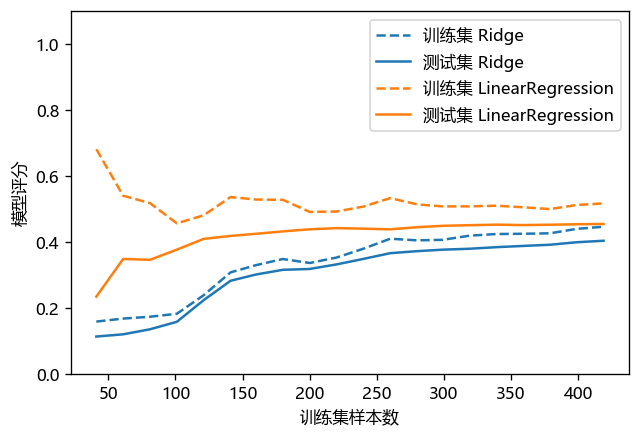

In [11]:
# 0.导入数据集生成工具和拆分工具
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve, KFold
import matplotlib.pyplot as plt

# 配置参数使 matplotlib绘图工具可以显示中文
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

# 1. 载入糖尿病情数据集
from sklearn.datasets import load_diabetes
X = load_diabetes().data
y = load_diabetes().target

# 定义一个用于绘制学习曲线的函数
def plot_learning_curve(est, X, y):
    # 将数据进行20次拆分来对模型进行评分
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes = np.linspace(0.1, 1, 20), 
                                                                  cv = KFold(20, shuffle = True, random_state = 1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis = 1), '--', label = "训练集 " + estimator_name)
    
    # plt.plot()参数解释：x轴，y轴，图标样式，图例（数组类型），色彩
    plt.plot(training_set_size, test_scores.mean(axis = 1), '-',
             label = "测试集 " + estimator_name, c = line[0].get_color())
    plt.xlabel("训练集样本数")
    plt.ylabel("模型评分")
    plt.ylim(0, 1.1) # y轴坐标范围

plt.figure(dpi = 120) # 设置图形的尺度
plot_learning_curve(Ridge(alpha = 1), X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc = "best")

**从上图中可以得到以上结论**：
1. 训练集评分始终高于测试集;
2. 岭回归的训练集和测试集之间的差距较小，基本没有过拟合问题，泛化性能较强;
3. 随着训练集样本数量的增加，两个模型测试集的性能也在提高
4. 随着训练集样本数量的增加，岭回归Ridge的性能区域稳定，且性能几乎和线性回归一致。说明数据量的增加使L2正则化的用处逐渐降低；
5. 随着训练集样本数量的增加，线性回归训练集的性能逐渐下降。说明随着数据量的增加，线性回归出现过拟合问题的几率逐渐下降，或者说越难学到训练集的知识。

=> <font color="red">**[重点知识]** 训练样本的增加(样本数量、样本类型)，(在一定程度上)是有助于提高系统性能</font>；

<font style="color:red; font-weight:bold;">【函数说明】[learning_curve](functions/learning_curve.ipynb) ：绘制学习曲线</font> 

## 4. 使用L1正则化的线性模型——套索回归（Lasso Regression）

### 4.1 套索回归的原理

套索(Lasso)回归也会将系数限制在一个非常接近于0的范围，但是与岭回归所使用的L2正则化不同，套索回归使用L1正则化，它会使一部分特征系数等于0，也就是说一部分特征被彻底忽略。这种方法可以被理解成一种特征选择。与神经网络CNN的Dropout算法相似。

*（此处暂时忽略这种算法的优势，有兴趣的同学可以Baidu一下，特别是Dropout算法）*

### 4.2 基于套索回归的预测

#### 4.2.1 套索回归在"糖尿病"数据集上的应用

In [1]:
# 0.导入数据集生成工具和拆分工具
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np

# 1. 载入糖尿病情数据集
from sklearn.datasets import load_diabetes
X = load_diabetes().data
y = load_diabetes().target

# 2. 使用train_test_split()函数对数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

In [1]:
# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
lasso = Lasso().fit(X_train, y_train)

# 4. 性能分析
score_train = lasso.score(X_train, y_train)
score_test = lasso.score(X_test, y_test)
print("训练集得分: {:.3f}".format(score_train))
print("测试集得分: {:.3f}".format(score_test))
print("样本的特征数量: {0}; 模型所使用特征的数量: {1}".format(X_train.shape[1], np.sum(lasso.coef_ != 0)))

训练集得分: 0.362
测试集得分: 0.366
样本的特征数量: 10; 模型所使用特征的数量: 3


**从实验结果可以得到以下结论：**
1. 实验结果非常糟糕，并且训练集和测试集的结果都很糟糕，这说明模型发生了欠拟合问题。即模型无法很好地学到训练数据的特征。"[过拟合和欠拟合](knowledgement/overfitting_underfitting.ipynb)"的问题将在后续的课程中，以专题形式探讨。
2. 样本具有10个特征而套索模型仅仅使用了3个特征，因此对于该数据集来说，特征学习度是显然不足的

#### 4.2.2 套索回归的优化

套索回归也存在一个超参数alpha用来控制特征变量的受约束程度，下面我们将研究超参数alpha对套索回归的性能影响。

默认情况下，alpha = 1，为了降低欠拟合的程度，所以尝试缩小alpha 值，同时增大模型默认的迭代次数（max_iter），即增加模型使用数据进行学习的次数。理论上，在一定范围内增加学习的次数（迭代次数）可以有效地提高模型学习的质量。

In [18]:
# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
lasso = Lasso(alpha = 0.1, max_iter = 100000).fit(X_train, y_train)

# 4. 性能分析
score_train = lasso.score(X_train, y_train)
score_test = lasso.score(X_test, y_test)
print("训练集得分: {:.3f}".format(score_train))
print("测试集得分: {:.3f}".format(score_test))
print("样本的特征数量: {0}; 模型所使用特征的数量: {1}".format(X_train.shape[1], np.sum(lasso.coef_ != 0)))

训练集得分: 0.519
测试集得分: 0.480
样本的特征数量: 10; 模型所使用特征的数量: 7


**从实验结果可以得到以下结论：**
1. 超参数alpha的降低，使欠拟合的问题基本消失了，但过拟合的问题逐渐显现
2. 由于欠拟合问题的解决，模型的性能有一定的提高。

下面我将继续降低超参数alpha的值：

In [19]:
# 3. 使用线性回归模型计算权重 *w* 和 截距 *b* 的值，并给出回归模型的方程
lasso = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)

# 4. 性能分析
score_train = lasso.score(X_train, y_train)
score_test = lasso.score(X_test, y_test)
print("训练集得分: {:.3f}".format(score_train))
print("测试集得分: {:.3f}".format(score_test))
print("样本的特征数量: {0}; 模型所使用特征的数量: {1}".format(X_train.shape[1], np.sum(lasso.coef_ != 0)))

训练集得分: 0.530
测试集得分: 0.459
样本的特征数量: 10; 模型所使用特征的数量: 10


从实验结果, 可以发现过拟合问题逐渐显现。（训练集性能远高于测试集性能）

#### 4.2.3 套索回归和岭回归的比较

下面将分别给出岭回归（alpha = 1）和套索回归（alpha = [1, 0.1, 0.001]）时，各个特征的系数量级对比图。

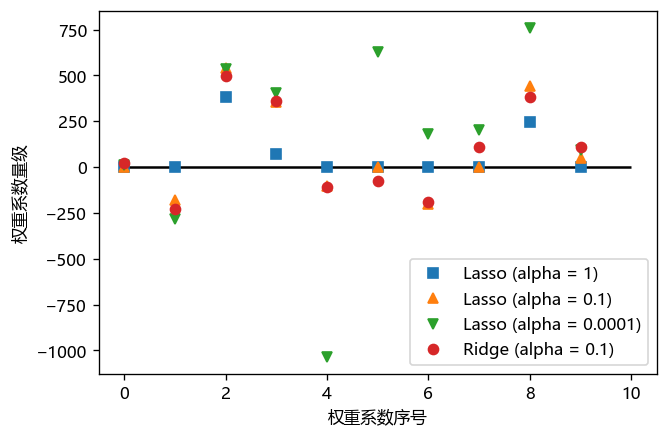

In [9]:
# 0.导入数据集生成工具和拆分工具
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 配置参数使 matplotlib绘图工具可以显示中文
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

# 1. 载入糖尿病情数据集
from sklearn.datasets import load_diabetes
X = load_diabetes().data
y = load_diabetes().target

# 2. 使用train_test_split()函数对数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

lasso1 = Lasso(alpha = 1, max_iter = 100000).fit(X_train, y_train)
lasso01 = Lasso(alpha = 0.1, max_iter = 100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

plt.figure(dpi = 120)
plt.plot(lasso1.coef_, 's', label = "Lasso (alpha = 1)")
plt.plot(lasso01.coef_, '^', label = "Lasso (alpha = 0.1)")
plt.plot(lasso00001.coef_, 'v', label = "Lasso (alpha = 0.0001)")
plt.plot(ridge01.coef_, 'o', label = "Ridge (alpha = 0.1)")
plt.legend(loc = "best")
plt.xlabel("权重系数序号")
plt.ylabel("权重系数量级")
plt.hlines(0, 0, len(ridge01.coef_)) # 绘制当前坐标轴上的水平线